<a href="https://colab.research.google.com/github/kobi-2/IUT-Lab-NumMethod/blob/main/Numericals_%5BMath_4544_Lab_03%5D_Nonlinear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1> Math 4544 Numerical Analysis Lab</h1>
<h2> Lab 04 <h2>

The Objectives of this weeks lab is to implement and understand non-linear regression.Non-linear regression is often used to find the regression model because the data can be produced from a non-linear system. In this model, we wish to predict response to $n$ data points $(x_{1} ,y_{1}),(x_{2} ,y_{2}),......,(x_{n} ,y_{n}) $ by a regression models given by<br>
> $γ = Ae^{λt} .................................(1)$ <br>

where $A$ and $λ$ are the constants of the regression model.
A measure of goodness of fit, that is, how well $Ae^{λt}$ predicts the response variable
$γ $ is the magnitude of the residual $ε_{i}$ at each of the $n$ data points. <br>
> $E_{i} = γ_{i} -Ae^{λt_{i}} ...........................(2)$ <br>

For more on non-linear interpolation, please visit the class [lecture.](http://mathforcollege.com/nm/mws/gen/06reg/mws_gen_reg_txt_nonlinear.pdf) Go to  [matplotlib.pyplot tutorials](https://matplotlib.org/gallery/index.html#pyplot) for all kinds of help regarding plot.  


## Task 01 ##
To find the contraction of a steel cylinder, one needs to regress the thermal expansion coefficient data to temperature. The thermal expansion coefficient at given different temperatures are given below in the table. Fit the given data to the regression model
> $ α = a_{0} + a_{1}T + a_{2}T^{2} $

|Temperature <br> F|Coefficient <br> α |
|---|---|
|80|6.47e-6|
|40|6.24e-6|
|-40|5.72e-6|
|-120|5.09e-6|
|-200|4.30e-6|
|-280|3.33e-6|
|-340|2.45e-6|
|---|---|



In [ ]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

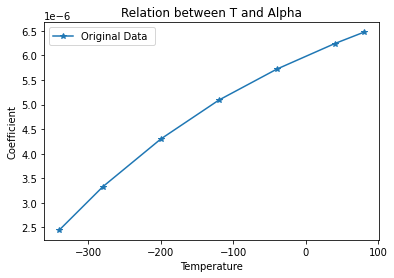

In [ ]:
#Dataset description for Task 01  


T = np.array([80,   40, -40,-120,-200,-280,-340])
alpha = np.array([6.47e-6,  6.24e-6,    5.72e-6,    5.09e-6,
                  4.30e-6,  3.33e-6,    2.45e-6])

plt.plot(T, alpha, label='Original Data ', marker='*')
plt.title('Relation between T and Alpha')
plt.xlabel('Temperature')
plt.ylabel('Coefficient')
plt.legend()
plt.show()

In [ ]:
def expression_maker(coef, var):
    [n, m] = coef.shape
    eq = str(coef[0][0]) 
    for i in range(1, n):
        if(i<2):
            eq = eq + str('+') + str(coef[i][0]) + str('*') + var
        else:
            eq = eq + str('+') + str(coef[i][0]) + str('*') + var+'**'+str(i)
    return eq

In [ ]:
def nonlinear_polynomial(T, alpha, order=2):
    n = len(T)
    M=np.zeros((order+1, order+1))
    M[0][0]=n
    b = np.zeros((order+1, 1))

    for i in range(order+1):
        if(i==0):
            b[i][0] =np.sum(alpha)
        else:
            b[i][0] = np.sum(np.power(T, i) * alpha)
    # print(b)
    for i in range(order+1):
        for j in range(order+1):
            if(i+j ==0):
                M[i][j]=n
            else:
                M[i][j] = np.sum(np.power(T, i+j))
    #Coefficients
    A = np.matmul(np.linalg.inv(M), b)
    # print(A)

    t=sym.symbols('t')
    ex = expression_maker(A,'t')
    ex
    alph = sym.sympify(ex)
    print(alph)


    T_new = np.arange(start=T[0], stop=T[n-1], step=(T[n-1]-T[0])/200)
    # print(T_new)
    alpha_new = []
    m = len(T_new)
    for i in range(m):
        alpha_new.append(alph.subs(t, T_new[i]))
    # print(alpha_new)

    # Comparative plotting
    #plt.scatter(T,alpha, label='Original Points', color = 'b')
    plt.plot(T,alpha, label = 'Normal Approximation', color='b', marker='*')
    plt.plot(T_new, alpha_new, label = 'Regression', color = 'r')
    plt.title('Regression test')
    plt.xlabel('Strain, (m/m))')
    plt.ylabel('Stress, Pa')
    plt.legend()
    plt.show()




-8.350299172022808e-22*t**4 + 1.2379288556382532e-14*t**3 - 7.38222826799914e-12*t**2 + 6.476630333564924e-9*t + 5.992418291742641e-6


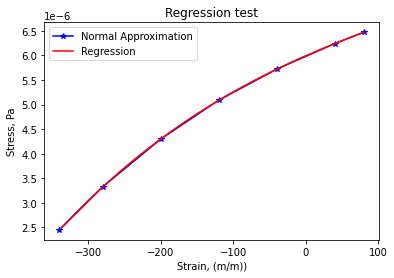

In [ ]:
nonlinear_polynomial(T,alpha, 4)

In [ ]:
T_new = np.arange(start=T[0], stop=T[n-1], step=(T[n-1]-T[0])/200)
print(T_new)
alpha_new = []
m = len(T_new)
for i in range(m):
    alpha_new.append(alph.subs(t, T_new[i]))
print(alpha_new)

# Comparative plotting
#plt.scatter(T,alpha, label='Original Points', color = 'b')
plt.plot(T,alpha, label = 'Normal Approximation', color='b', marker='*')
plt.plot(T_new, alpha_new, label = 'Regression', color = 'r')
plt.title('Regression test')
plt.xlabel('Strain, (m/m))')
plt.ylabel('Stress, Pa')
plt.legend()
plt.show()

## Task 02 ##
To find the longtidinal modulous of a composite materials, the follwoing data, as given in the table is collected.

| Strain [m/m] |  Stress [Pa] |
| --- | --- | 
| 0 | 0 | 
| 0.183 | 306 | 
| 0.36 | 612 | 
| 0.5224 | 917 | 
| 0.702 | 1223 | 
| 0.867 | 1529 | 
| 1.0244 | 1835 | 
| 1.1774 | 2140 | 
| 1.329 | 2446 | 
| 1.479 | 2752 |
| 1.5 | 2767 | 
| 1.56 | 2896 | 

Find the longitudinal modulous $E$ using the regression model  $ σ = Eε$



In [ ]:
# Dataset description for Task 02
strain = np.array([0.0000,      1.83e-3,    3.6e-3,  
                   5.324e-3,    7.020e-3,   8.67e-3,
                   1.0244e-2,   1.1774e-2,  1.329e-2,
                   1.479e-2,    1.5e-2,     1.56e-2])

stress = np.array([ 0.000,    3.06e8,     6.12e8, 
                    9.17e8,   1.22e9,     1.529e9, 
                    1.835e9,  2.14e9,     2.446e9,
                    2.752e9,  2.767e9,    2.896e9 ])

The value of E is:  182820907110.36127


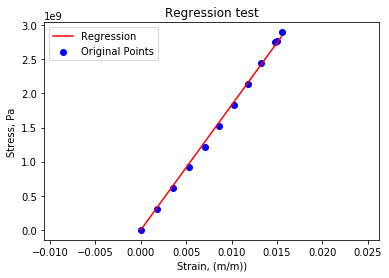

In [ ]:
x = strain
y = stress

#Calculating the values of k1 and k2
n = len(x)
x_squared = np.multiply(x,x)
xy = np.multiply(x,y)
E = float(np.sum(xy)/np.sum(x_squared))
print('The value of E is: ' , E)

# Taking data points for line plot
eps = sym.symbols('eps')
sigma = E * eps
x_range = np.arange(start = x[0], stop=x[len(x)-1], step = 0.0001 )
y_pred = np.arange(start = x[0], stop=x[len(x)-1], step = 0.0001 )
m=len(x_range)
for i in range(m):
    y_pred[i] = sigma.subs(eps, x_range[i])

# Comparative plotting
plt.scatter(x,y, label='Original Points', color = 'b')
# plt.plot(x,y, label = 'Normal Approximation', color='g')
plt.plot(x_range, y_pred, label = 'Regression', color = 'r')
plt.title('Regression test')
plt.xlabel('Strain, (m/m))')
plt.ylabel('Stress, Pa')
plt.legend()
plt.show()

### Observations ###

## Task 03 ## 
Many patients get concerned when a test involves injection of a radioactive material.  For example for scanning a gallbladder, a few drops of $Technetium-99m$ isotope is used.  Half of the $Technetium-99m$ would be gone in about 6 hours.  It, however, takes about 24 hours for the radiation levels to reach what we are exposed to in day-to-day activities.  Below is given the relative intensity of radiation as a function of time.The following table gives Relative intensity of radiation as a function of time

|t (hrs)|0|1|3|5|7|9|
|---|---|---| ---|---|---|---|
|1.000|0.891|0.708|0.562|0.447|0.355|

If the level of the relative intensity of radiation is related to time via an exponential formula $γ = Ae^{λt}$, then find the following. 

1. the value of the regression constants  and ,
2. the half-life of Technium-99m, and
3. the radiation intensity after 24 hours.




## Solution: ## 
$$\gamma = Ae^{\lambda t}..........................(1)$$
$$ln(\gamma) = ln(A) + \lambda t$$
Assuming that
$$y = ln(\gamma)$$
$$a_{0} = ln(A)$$
$$ a_{1} = \lambda$$
Thus we get
$$y = a_{0} + a_{1}t$$
This is a linear relation between $y$ andn $t$
Here the solution of the linear regression model will be as follows
$$a_{1} = \frac{n\sum_{i=1}^{n}t_{i}y_{i} -\sum_{i=1}^{n}t_{i}\sum_{i=1}^{n}y_{i}   }              {n\sum_{i=1}^{n}t_{i}^{2} - (\sum_{i=1}^{n}t_{i})^{2}}$$ <br>
$$a_{0} = \bar{y} -a_{1}\bar{t}$$<br>

Now to get back to the equation(1) we calculate the following. 
$$A = e^{a_{0}}    $$and$$ \lambda = a_{1}$$


In [ ]:
#Solution Code:
t = np.array([0,1,3,5,7,9])
gamma = np.array([1, 0.895, 0.708, 0.562, 0.447, 0.355])


In [ ]:
def least_square_method(x,y):
    xy= x*y
    x_sq = np.power(x, 2) 
    n = len(x)
    a1 = (n*np.sum(xy)-np.sum(x)*np.sum(y))/(n*np.sum(x_sq) - np.power(np.sum(x), 2))
    a0 = np.mean(y) - a1*np.mean(x)
    return [a1, a0]


In [ ]:
def exponential_regression(x, gamma):
    y = np.log(gamma)
    # xy= x*y
    # x_sq = np.power(x, 2) 
    # n = len(x)
    # a1 = (n*np.sum(xy)-np.sum(x)*np.sum(y))/(n*np.sum(x_sq) - np.power(np.sum(x), 2))
    # a0 = np.mean(y) - a1*np.mean(x)
    [a1, a0]=least_square_method(x, y)

    A = np.exp(a0)
    lambd = a1
    e = np.exp(1)
    k = sym.symbols('k')
    regr = A * e**(lambd*k)
    
    y1=[]
    n=len(x)
    for i in range(n):
        y1.append(regr.subs(k, x[i]))
    
    print(y1)
    
    plt.plot(x, gamma, marker='*', color='b', label='Original Points')
    plt.plot(x, y1, marker='*', color='r', label='Regression')
    plt.title('Radioactive decay with time')
    plt.xlabel('Time (hour)')
    plt.ylabel('Remaining amount')
    plt.legend()
    plt.show
    
    

In [ ]:
exponential_regression(t, gamma)

## Task 04 ##
To be able to draw road networks from aerial images, light intensities are measured at different pixel locations. The following intensities are given as a function of pixel location.

|Pixel Location, (k)| Intensity (y)|
|---|---|
|-3|119|
|-2|165|
|-1|231|
|0|243|
|1|244|
|2|214|
|3|136|

Regress the above data to a second order polynomial given by
$$ y = a_{0} + a_{1}k + a_{2}k^{2}$$

-13.357142857142861*t**2 + 5.785714285714286*t + 246.57142857142856


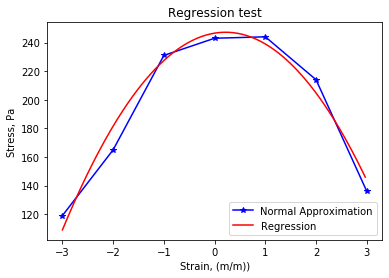

In [ ]:
# Solution Code:
# Using the nth polynomial regressor created above by the name nonlinear_polynomial()
k = np.array([-3,-2,-1,0,1,2,3])
y = np.array([119,165,231,243,244,214,136])

nonlinear_polynomial(k, y, order=2)

## Example 5 ##
Sodium borohydride is a potential fuel for fuel cell. The following overpotential $(\eta)$  vs. current $(i)$ data was obtained in a study conducted to evaluate its electrochemical kinetics.

|$\eta(V)$ |-0.29569|-0.24346|-0.19012| -0.18772|-0.13407|-0.0861|
|---|---|---| ---|---|---|---|
|$i (A)$|0.00226|0.00212|0.00206|0.00202|0.00199|0.00195|

At the conditions of the study, it is unknown that the relationship that exists between the overpotential $(\eta)$ and current $(i)$ can be expressed as $$\eta = a + bln(i)$$ where $a$ is an electrochemical kinteics parameter of borohydride on the electrode. Use the data in the table above  to evaluate the values of $a$ and $b$.

In [ ]:
#Solution code for example 5
eta = np.array([-0.29569,	-0.24346,	-0.19012,	-0.18772,	-0.13407,	-0.0861])
current = np.array([0.00226,	0.00212,	0.00206,	0.00202,	0.00199,	0.00195])

plt.plot(current, eta, label='Original Data', marker = "o", linestyle="None")
plt.title('Electrochemical Kinetics of boro hydride')
plt.xlabel('Eta (Volt)')
plt.ylabel('Current (Ampere)')
plt.legend()
plt.show()

In [ ]:
def electrokinetic_regression(current, eta):
    x = np.log(current)
    y = eta
    [b, a]=least_square_method(x, y)

    print(b,a)
    
    y1=[]
    n=len(current)
    for i in range(n):
        y1.append(a +b*np.log(current[i]))
    
    print(y1)
    
    plt.plot(current, eta, marker='*', color='b', label='Original Points')
    plt.plot(current, y1, marker='*', color='r', label='Regression')
    plt.title('Radioactive decay with time')
    plt.xlabel('Time (hour)')
    plt.ylabel('Remaining amount')
    plt.legend()
    plt.show

-1.3604787061462449 -8.601362712484043
[-0.3127952143735886, -0.2257943362697059, -0.18673484856545386, -0.16005794078149016, -0.13970127112204445, -0.11207638888771854]


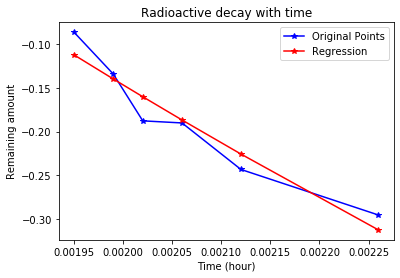

In [ ]:
electrokinetic_regression(current, eta)

## Example 6##
The progress of a homogeneous chemical reaction is followed and it is desired to evaluate the rate constant and the order of the reaction. The rate law expression for the reaction is known to follow the power function form $$-r = kC^{n}$$
	 								                       (35)
Use the data provided in the table to obtain $n$ and $k$ .

|$C_{A}(gmol/l)$|4|2.25|1.45|1.0|0.65|0.25|0.006|
|---|---|---|---|---|---|---|---|
|$-r_{A} (gmol/l.s)$|0.398|0.298|0.238|0.198|0.158|0.098|0.048




## Solution##
Taking the natural log o fboth sides of the given equation, we obtain
$$ln(-r) = ln(k) + nln(C)$$
let $$z = ln(-r)$$
$$w = ln(C)$$
$$a_{0} = ln(k)$$
Therefore $k = e^{a_{0}}$ and $a_{1} = n$
Therefore we get the following linear model for regression. 
$$z = a_{0} + a_{1}w$$

0.3194053297455961 -1.5710663370762592
[0.32359047473456665, 0.26926724843298566, 0.2340110466547306, 0.20782345430496757, 0.18110818910214463, 0.1334729898791895, 0.0405531156878206]


<function matplotlib.pyplot.show>

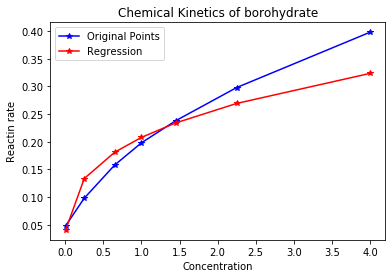

In [ ]:
# Solution code
C = np.array([4,	2.25,	1.45,	1.0,	0.65,	0.25,	0.006])
r = np.array([0.398,	0.298,	0.238,	0.198,	0.158,	0.098,	0.048])

z = np.log(r)
w = np.log(C)
[a1, a0]=least_square_method(w, z)
print(a1, a0)

k= np.exp(a0)
n = a1    
y1=[]
m=len(C)
for i in range(m):
    y1.append(k*np.power(C[i], n))
    
print(y1)
    
plt.plot(C, r, marker='*', color='b', label='Original Points')
plt.plot(C, y1, marker='*', color='r', label='Regression')
plt.title('Chemical Kinetics of borohydrate')
plt.xlabel('Concentration')
plt.ylabel('Reactin rate')
plt.legend()
plt.show